# Project 1: Tuberculosis  & Mortality - a study by Chris Pyves

Based on an original article published by Michel Wermelinger, 14 July 2015, with recent updates & contributions by Chris Pyves dated 13 October 2016

## Introduction
In 2000, the United Nations set eight Millenium Development Goals (MDGs) to reduce poverty and diseases, improve gender equality and environmental sustainability, etc. Each goal is quantified and time-bound, to be achieved by the end of 2015. Goal 6 is to have halted and started reversing the spread of HIV, malaria and tuberculosis (TB).
TB doesn't make headlines like Ebola, SARS (severe acute respiratory syndrome) and other epidemics, but is far deadlier. For more information, see the World Health Organisation (WHO) page <http://www.who.int/gho/tb/en/>.

---

## Tuberculosis is history’s deadliest disease: it has killed one out of every seven people to ever live on the planet!

>*“If the importance of a disease for mankind is measured by the number of fatalities it causes, then tuberculosis must be considered much more important than those most feared infectious diseases, plague, cholera and the like. One in seven of all human beings dies from tuberculosis.” –Robert Koch, 1882*

Given the population and number of deaths due to TB in some countries during one year, the following questions will be answered: 

- What is the total, maximum, minimum and average number of deaths in that year?
- Which countries have the most and the least deaths?
- What is the death rate (deaths per 100,000 inhabitants) for each country?
- Which countries have the lowest and highest death rate?

The death rate allows for a better comparison of countries with widely different population sizes.
The standard that will be used for reporting is: the number of deaths from TB estimated to occur in a year for every group of 100,000 people

### The source data

The data consists of total population and total number of deaths due to TB (excluding HIV) in 2014 for all 193 countries in the world.

The original study covered the year 2013 (and whilst these figures have subsequently been updated by WHO) new figures are now available for 2014 for both Population and TB deaths by Country. A decision was therefore made to combine Deaths from TB with Population totals by Country for 2014 and review the resulting data. 

The original data for 2013 taken in June 2015 whilst the data for 2014 was downloaded in October 2016 from the WHO website: [World Population data for 2014](http://apps.who.int/gho/data/node.main.POP107?lang=en (population) and [World TB deaths for 2014](http://apps.who.int/gho/data/node.main.593?lang=en (deaths).<br>(The uncertainty bounds of the number of deaths were ignored).</br>

- Data download CSV file 5.5kb Population by Country 2014 Last updated: (2016-04-14)
- Data download CSV file 10.0kb Deaths due to TB by Country for 2014 Last updated: (2015-11-25)
- The raw data was parsed using Google sheets and saved as 'WHO POP TB 2014 Chris Pyves.xlsx' 
- [Link to excel data file (read only)](http://tinyurl.com/hufyhbx) **This file should be placed in the same folder as this notebook.**


In [1]:
# First, we need to import the standard pandas libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # import matplotlib.pyplot as plt standard New in Panda version 0.11.0.
pd.__version__ # Outputs panda version being used

'0.15.0'

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Next, we read in the sample data (and get a summary of how it looks).
# To return a DataFrame
# read_excel('path_to_file.xls', sheetname='Sheet1') # This is the basic syntax 
#data = read_excel('WHO POP TB 2014.xlsx') # note: this was the original format given when "import panda as *" was used
data = pd.read_excel('WHO POP TB 2014 Chris Pyves.xlsx') # needed to add pd. prefix to take advantage of pands pd assignment

# Examining the data file
### Data Validation checks:
Because this data has come direct from the WHO website and is relatively small it has already been visually checked and found to be in good condition.
No further validation steps are required.
Once the excel file has been read: the size of the data can be defined as follows: 
- Number of records in the data set (rows)x (columns)
- Column Header Names (useful if further reports are required)

In [3]:
# Output the number of rows & columns
numrows = len(data)    # 194 rows in this example
numcols = len(data.columns)   # 3 columns in this example
print("The data file contains {0} Total rows x {1} Total columns of data (each row is indexed)".format(numrows, numcols))
# code to report how large the excel import file is

The data file contains 194 Total rows x 3 Total columns of data (each row is indexed)


In [4]:
# display how the dataframe sees the column names
#data.columns.tolist()
print("Column header names used in this data file are as follows: {0} ".format(data.columns.tolist()))
# These names will be required for coding reports (by column)

Column header names used in this data file are as follows: ['Country', 'Population (1000s)', 'TB deaths'] 


### Max_row settings:

There seems to be a limit on the number of rows that panda reports.
- pd.options.display.max_rows # will report max_rows that panda is set to
- pd.options.display.max_rows = 999 allows this number to be increased

Given that this data file contains 195 rows it only needs to be changed to 200 to cover everything


In [5]:
#This command reports max rows will be displayed 
# To change the current setting remove # and enter required value in line below then run cell to check that change has been made
pd.options.display.max_rows = 200 # this number can be changed if required [between 0 - 999]
print("Note: maximum row setting is currently set at {0} rows".format(pd.options.display.max_rows))
# this value can be increased to 999 but text wrapping may still occur with column data 

Note: maximum row setting is currently set at 200 rows


In [6]:
# Now show the first 5 rows of table
data.head()
# this command is helpful to see how the imported data is set out

Country  Population (1000s)  TB deaths
0  Afghanistan             31627.5   14000.00
1      Albania              2889.7      17.00
2      Algeria             38934.3    4400.00
3      Andorra                72.8       0.55
4       Angola             24227.5   13000.00

In [7]:
# Code to check the bottom of the data set (last five records)
data[-5:]
# note column widths are different to head() command

Country  Population (1000s)  TB deaths
189  Venezuela (Bolivarian Republic of)             30693.8        540
190                            Viet Nam             92423.3      17000
191                               Yemen             26183.7       1100
192                              Zambia             15721.3       5100
193                            Zimbabwe             15245.9       2300

Now that we know that the data appears to have loaded successfully we can start analysing it to see what information is contained within.
<br>(Note in the original data upload an error was detected & the excel file was corrected at source)</br>

### Data total checks
We now start to look at the data to get a better feel for the scope of the data
- Data Totals (by column) for Population & TB deaths
- Population statistics:
    - minimum maximum & Data range
    - mean median & mode
    - Upper & lower quartiles

##### What software tools are available to analyse this data?
The following shows the use of the describe() method:

In [8]:
# Geting a handle on the dataset: How large is the file and how many records does it contain [when was it issued? Source & date of aquisition]
# Data Statistics: Number of records value range & distribution
data.describe()# 
#This is a very useful command to provide an initial overview of your data

Population (1000s)      TB deaths
count          194.000000     194.000000
mean         37407.166495    5768.637835
std         141406.103139   22706.403800
min              1.600000       0.000000
25%           1832.425000      24.250000
50%           7950.600000     265.000000
75%          25894.475000    2300.000000
max        1400000.000000  220000.000000

## How to Extract useful totals from this data? 


Lets just check the what the Total Population was for the World in 2014
>*According to the United Nations, world population reached 7 Billion on October 31, 2011. [Google search]*

In [9]:
# Creating a variable called popColumn enables us to call up all population column data & perform calculations  
popColumn = data['Population (1000s)'] 
#popColumn.describe() # Returns Name: Population (1000s), dtype: float64
popColumn.sum()

7256990.2999999998

That looks reasonable so lets now look for the largest and smallest populations in our data set:

In [10]:
popColumn.max()
#data,max({index (0), columns (2)}) # NameError: name 'index' is not defined
#axis : {index (0), columns (1)}

1400000.0

In [11]:
popColumn.min()

1.6000000000000001

The Range of Population data can be calculated as: Population (Max) - Population (Min) 

In [12]:
popRange = popColumn.max()-popColumn.min()
popRange

1399998.3999999999

What else can we do to analyse Population data a bit further?
- mean (a number expressing the central or typical value in a set of data, which is calculated by dividing the sum of the values in the set by their number)
- median (a value or quantity lying at the midpoint of a frequency distribution of observed values or quantities)
- mode (the value that occurs most frequently in a given set of data)

In [13]:
popColumn.mean() # Return the mean of the values for the requested axis
# mean : Series or DataFrame (if level specified)
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html

37407.166494845362

In [14]:
popColumn.median() # Return the median of the values for the requested axis
# median : Series or DataFrame (if level specified)
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html

7950.6

### Comment on Population data:

As the median value is significantly lower than the mean it suggests that Population is not evenly distributed by country. This fact will be confirmed later on.

In [15]:
# mode: finding values that occurs most frequently in a given set of data
#Unless this data is grouped into ranges it is not going to produce meaningful results
popColSort = data.sort('Population (1000s)', ascending = 0)#.mode()
#popColSort['Population (1000s)']# produces list of all Populations in descending order
#http://pandas.pydata.org/pandas-docs/stable/groupby.html

#Unless this data is grouped into ranges it is not going to produce meaningful results
# modes : DataFrame (sorted) # This could be a clue!
# pandas.DataFrame.mode applies to ver 0.18.0
# df = pd.DataFrame({'A': [1, 2, 1, 2, 1, 2, 3]})
# df.mode()
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html

### Comment on the Mode command:

Using the mode command is not going to yield any useful data unless we can group the data into range categories
This is a topic that will be returned to later. See for reference:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure
<br>[How to use Group by: Split - Apply - Combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html)<br>

### How to return Sum Control Totals for all columns in the file?

In [16]:
# The following is a useful comand to return Total values for all columns
data.sum()
# To apply this command to a range of columns set the start, end & step parameters
# data[0:].sum() both commands return totals stacked one on top of the other
# I have yet to work out how to show values horizonatally (Transpose does NOT work here)

Country               AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
Population (1000s)                                              7256990
TB deaths                                                       1119116
dtype: object

## How is the Population data distributed?
### What does it look like?
One way to get a better idea of how our data is distributed is to display it in some way.
I have tried a number of options and the following seems to show the data best

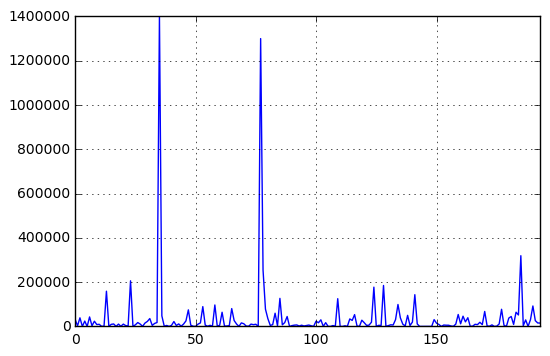

In [17]:
temps = pd.DataFrame(data)
#temps['Population (1000s)']#returns index & data from specified col
#type(temps['Population (1000s)']) # returns pandas.core.series.Series
temps['Population (1000s)'].plot() # returns a plot of population data according to index position in data file *not sorted*
#How do we report this data as a sorted list?
#if we assign to new variable we get a series
#newtemp = temps['Population (1000s)']
#newtemp

What the plot above shows are the populations for each country according to their position in the data file.

So we can see at a glance that just four countries appear to have populations above 200m. Whilst the rest are all below 200m.

However it might be better if we could sort this list into descending Population order to see the distribution a bit more clearly.


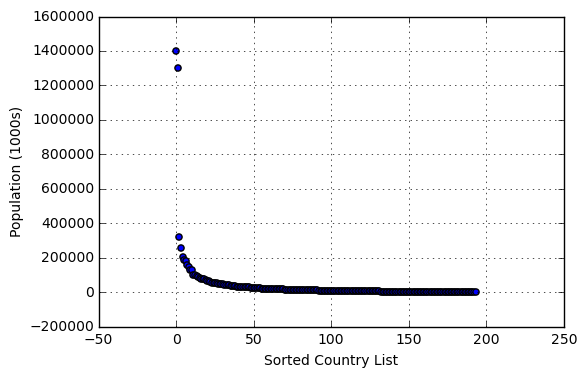

In [18]:
#Used to plot Country Populations (sorted into descending order by country population)
popIndex = data.sort('Population (1000s)', ascending = 0) 
popIndex['Sorted Country List'] = list(range(len(popIndex.index))) 
#popIndex
popIndex.plot(kind='scatter', x= 'Sorted Country List', y = 'Population (1000s)') # Plots Population against an index of countries sorted by population

This shows that global population is concentrated in just a few countries.
This graph appears to describe a hyperbolic curve and suggests that perhaps a logarithmic scale might be a better tool for analysing this data.
From the plots above it appears that around five countries had a Population above 200m in 2014.
This can be confirmed by printing out the top six countries.

In [19]:
#popIndex['Sorted Country List']
data.sort('Population (1000s)', ascending = 0)[:6]


Country  Population (1000s)  TB deaths
35                      China             1400000      38000
77                      India             1300000     220000
185  United States of America              319449        460
78                  Indonesia              254455     100000
23                     Brazil              206078       5300
128                  Pakistan              185044      48000

### The top five countries account for almost half the worlds population.

Number of countries 5
Total sum of combined populations 3,479,982k = 3.48bn people
Total sum of TB deaths 363,760

If we add up the top five country populations ( those above 200m) we get a total of 3.48bn which when divided by the World's Total Population of 7.25bn  gives a result of 48%. 

Top Five Countries by Population: Country Index Codes [35,77,185,78,23]

# Turning our attention to the TB problem

>One third of the world's population is infected with TB. In 2014, 9.6 million people around the world became sick with TB disease. 
<br>There were 1.5 million TB-related deaths worldwide. TB is a leading killer of people who are HIV infected.

Whilst Tuberculosis is an entirely curable disease it is also one of the Top 10 Global Killer's

What data can we extract to present a better picture of the situation?

- TB statistics:
    - minimum maximum & Data range
    - mean median & mode
    - Upper & lower quartiles

** The actual WHO data for TB deaths in 2014 is a bit smaller than the headline figures would suggest: as 1.5m becomes 1.1m **

In [20]:
# Creating a variable called tbColumn enables us to call up all TB death column data & perform calculations  
tbColumn = data['TB deaths'] 
#popColumn.describe() # Returns Name: Population (1000s), dtype: float64
tbColumn.sum()

#Chigozie Onyekwelu - code test
#tbColumn = data['Population (1000s)'] 
#tbColumn.sum ()

1119115.7400000002

The largest and smallest number of deaths in a single country are:

In [21]:
tbColumn.max()

220000.0

In [22]:
tbColumn.min()

0.0

So the Range of TB deaths can be calculated as: TB deaths (Max) - TB deaths (Min) 

In [23]:
tbRange = tbColumn.max()-tbColumn.min()
tbRange

220000.0

What else can we do to analyse the TB deaths data a bit further?
- mean (a number expressing the central or typical value in a set of data, which is calculated by dividing the sum of the values in the set by their number)
- median (a value or quantity lying at the midpoint of a frequency distribution of observed values or quantities)
- mode (the value that occurs most frequently in a given set of data)

In [24]:
tbColumn.mean() # Return the mean of the values for the requested axis
# mean : Series or DataFrame (if level specified)
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html

5768.6378350515479

In [25]:
tbColumn.median() # Return the median of the values for the requested axis
# median : Series or DataFrame (if level specified)
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html

265.0

### Comment on Tuberculosis data:

From 0.0 to almost a quarter of a million deaths is a huge range. The average number of deaths, over all countries in the data, gives a better idea of the seriousness of the problem in each country. But given the wide range of deaths, the median is probably a more sensible average measure. 

As was found in the study into Population distribution TB deaths are not evenly distributed across all countries. **Some countries are more affected than others.**



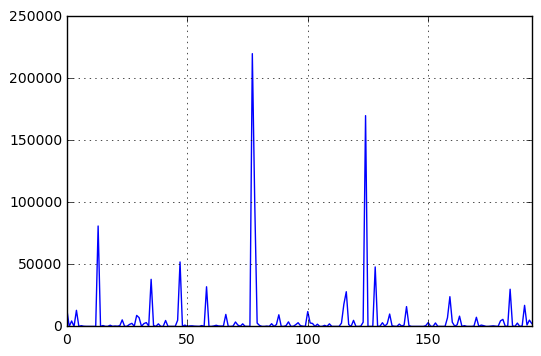

In [26]:
# Looking at the TB deaths in the data file by county
temps2 = pd.DataFrame(data)
#temps['Population (1000s)']#returns index & data from specified col
#type(temps['Population (1000s)']) # returns pandas.core.series.Series
temps2['TB deaths'].plot() # returns a plot of TB deaths data according to index position in data file *not sorted*

It would be interesting to try and overlay the two graphs above for Population & TB deaths as they are both in the same order. 

But a more revealing analysis might be to plot TB deaths by Population (see below).

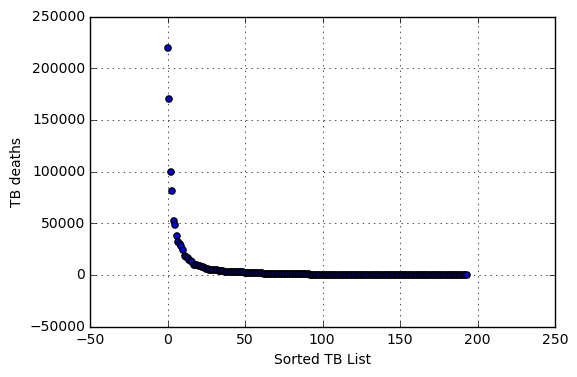

In [27]:
#Used to plot TB deaths by county (sorted into descending order)
tbIndex = data.sort('TB deaths', ascending = 0) 
tbIndex['Sorted TB List'] = list(range(len(tbIndex.index))) 
#tbIndex
tbIndex.plot(kind='scatter', x= 'Sorted TB List', y = 'TB deaths') # Plots TB deaths against an index of countries sorted by TB deaths

This graph shows the distribution of TB deaths by Countries (sorted in descending order of TB deaths)
The plots describe a hyperbolic curve similar to the distribution of Population by Countries.
From the points above it appears that around five countries had more than 50,000 TB deaths in 2014.
This can be confirmed by listing the top six countries (see below).

In [28]:
#popIndex['Sorted Country List']
data.sort('TB deaths', ascending = 0)[:6]

Country  Population (1000s)  TB deaths
77                              India             1300000     220000
124                           Nigeria              177476     170000
78                          Indonesia              254455     100000
13                         Bangladesh              159078      81000
47   Democratic Republic of the Congo               74877      52000
128                          Pakistan              185044      48000

## Results:

### 5 Countries that account for 56% of global deaths caused by TB

- number of countries 5
- Total sum of combined populations 1,965,886k = 1.965bn people 
- Total sum of TB deaths 623,000
- Country population as a percentage of the world total 1.965/7.257 = 27.0%
- Country TB deaths as a percentage of world TB deaths 623,000/1,119,116 = 55.7%

Top 5 Countries by TB deaths: Country Index Codes [77,124,78,13,47] India, Nigeria, Indonesia, Bangladesh,Democratic Republic of the Congo,

The top five countries sorted by TB deaths (above 50,000) have a combined total of 623,000 which when divided by Total TB deaths in the World of 1.1m  gives a result of 56%.

At this point in the research it might be appropriate to extend the list of countries with the most TB death to look at this data in more detail. 

This is very easy to implement as there is only one number in the code to change (see below)

In [29]:
data.sort('TB deaths', ascending = 0)[:15]

Country  Population (1000s)  TB deaths
77                              India           1300000.0     220000
124                           Nigeria            177476.0     170000
78                          Indonesia            254455.0     100000
13                         Bangladesh            159078.0      81000
47   Democratic Republic of the Congo             74877.0      52000
128                          Pakistan            185044.0      48000
35                              China           1400000.0      38000
58                           Ethiopia             96958.7      32000
184       United Republic of Tanzania             51822.6      30000
116                           Myanmar             53437.2      28000
159                      South Africa             53969.1      24000
115                        Mozambique             27216.3      18000
190                          Viet Nam             92423.3      17000
141                Russian Federation            143429.0      16000
0                         Afghanistan             31627.5      14000

## Results:

### Top 15 Countries account for 80% of worldwide deaths caused by TB

- number of countries 15
- Total sum of combined populations 4,101,813.7k = 4.1bn people 
- Total sum of TB deaths 888,000
- Country population as a percentage of the world total 4.1/7.257 = 56.5%
- Country TB deaths as a percentage of world TB deaths 888,000/1,119,116 = 80%

Adding 10 more countries to the previous list of 5 countries creates a group with a combined country population of 4.1bn people which represents 56% of worldwide population. Total TB deaths for the group are 888,000 and represents 80% of all worldwide deaths from TB.

The 10 extra countries that are added to the previous five countries are (in order): Pakistan, China, Ethiopia, United Republic of Tanzania, Myanmar, South Africa, Mozambique, Viet Nam, Russian Federation, Afghanistan

The top 15 countries can be seen in the list above. The range of actual deaths due to TB is quite wide starting with India at 220,000 and running down to Afghanistan with 14,000 TB related deaths.

Whilst it is quite difficult to put a classification on this collection of 15 countries it does include all the BRIC's countries except for Brazil (see BRICs table lower down in this report). China was retained because its TB mortality is above 14,000 whereas Brazil with 5,300 TB deaths was excluded because it was below the  cutoff threshold of 14,000. 

[Link to map showing the top 15 countries by location](http://tinyurl.com/z8vjguy)

One way to classify these 15 countries might be to divide them into their continental groupings; African or Asian countries.

** The African Countries include:** Nigeria, Democratic Republic of the Congo, Ethiopia, United Republic of Tanzania, South Africa, Mozambique :(6)

** The Asian countries inclide:** India, Indonesia, Bangladesh, Pakistan, China,  Myanmar, Viet Nam, Russian Federation, Afghanistan :(9)


Top 15 Countries by TB deaths: Country Index Codes: [77,124,78,13,47,128,35,58,184,116,159,115,190,141,0] 

If we plot both Population & TB Deaths together (Population on the Y axis and TB deaths on the X axis) we will get a better view of this data to identify which countries are on the data extremities (see below).

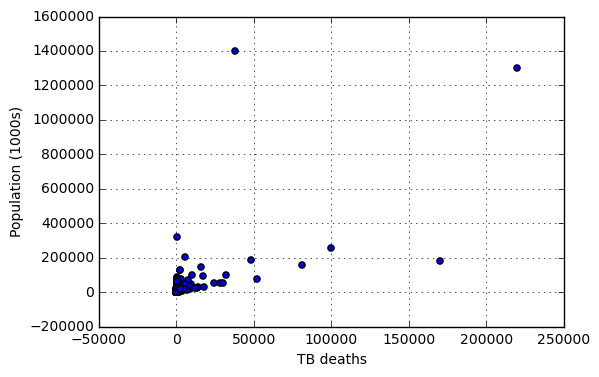

In [30]:
#This graph plots deaths by population
#data['TB deaths'].plot() # 'Population (1000s)' # Produces a graphical representation of Population data by country index number
#It would be nice to sort this data into descending order & plot histogram
#Question: How do you plot a sorted list of Populations in descending order 

data.plot(kind='scatter', x= 'TB deaths', y = 'Population (1000s)') # This also works by plotting deaths against Population

The cutoff for the top 15 Countries is 14,000 TB deaths in a year. Countries that are above this level will appear in the list whereas those that are below will not.

## An interesting graph with some extreme results:

Whilst the bulk of the data is concentrated in the bottom left hand corner it is the countries that are outside this area that warrent close attention.

- The country with the highest population but a TB death rate of less than 50,000 is China [35].
- The country with the second highest population but highest number of TB death is India [77].
- The country with the second highest TB death rate but with a population just below 200,000 is Nigeria [124].

(For full details see the list below)

In [31]:
# How to report different rows of all data together
# countryCodes = [35,77,124,]
data.loc[data.index.isin([35,77,124])]

Country  Population (1000s)  TB deaths
35     China             1400000      38000
77     India             1300000     220000
124  Nigeria              177476     170000


It is worth noting that focusing our attention strictly on Countries with the largest Populations or the largest TB deaths could be misleading. 

In order to make a fair comparison the rate of TB deaths per 100,000 people will now be calculated and then analysed.

## Identifying the Countries that have the highest TB death rates per 100,000

The calculations is performed as follows and a new group of 15 Countries (ordered by TB Death rates per 100,000) are listed in descending order:

In [32]:
# Command to calculate rate per 100,000 and add results to data table with column heading: 'TB deaths (per 100,000)'
popColumn = data['Population (1000s)']
tbColumn = data['TB deaths']
data['TB deaths (per 100,000)'] = tbColumn * 100 / popColumn
#data
data.sort('TB deaths (per 100,000)', ascending = 0)[0:15]

Country  Population (1000s)  TB deaths  \
49                           Djibouti               876.2       1100   
124                           Nigeria            177476.0     170000   
172                       Timor-Leste              1157.4       1100   
47   Democratic Republic of the Congo             74877.0      52000   
96                            Liberia              4396.6       3000   
158                           Somalia             10517.6       7000   
95                            Lesotho              2109.2       1400   
115                        Mozambique             27216.3      18000   
117                           Namibia              2402.9       1500   
71                      Guinea-Bissau              1800.5       1100   
29                           Cambodia             15328.1       8900   
184       United Republic of Tanzania             51822.6      30000   
62                              Gabon              1687.7        940   
92   Lao People's Democratic Republic              6689.3       3700   
4                              Angola             24227.5      13000   

     TB deaths (per 100,000)  
49                125.542114  
124                95.787599  
172                95.040608  
47                 69.447227  
96                 68.234545  
158                66.555108  
95                 66.375877  
115                66.136837  
117                62.424570  
71                 61.094141  
29                 58.063296  
184                57.889801  
62                 55.697103  
92                 55.312215  
4                  53.658033

### Results:

**28% of all TB deaths occur in countries with 5.5% of the worlds population**

- number of countries 15
- Total sum of combined populations 402,584.9k = 402.6m people 
- Total sum of TB deaths 312,740    
- Country population as a percentage of the world total 0.402/7.257 = 5.5%    
- Country TB deaths as a percentage of world TB deaths 312,740/1,119,116 = 28% 

So this analysis really seems to have churned the data up. Only four countries that were in the previous list remain (see below) whilst 11 countries have come off the list they have been replaced by a new 11 countries. Previously the cut off was TB deaths below 14,000. But now that the focus has turned to countries with the highest rates of TB death / 100,000 countries with smaller populations have been admitted whilst some countries with larger population have been removed because they were below **the rates threshold which can be seen from the listing to be above 53.0 TB deaths/100,000.** Countries above this rate will be included while countries below will not.

**But what has actually happened here?**
Previously selecting the top 15 countries that had the highest TB deaths produced a list that covered 56.5% of the worlds population and accounted for 80% of worldwide deaths caused by TB. Now by focusing on those countries with the highest rates of TB death per 100,000 people the countries included only cover 5.5% of the worlds population but account for 28% of worldwide deaths caused by TB.

The change in countries represents a subtle shift in focusing attention to those countries that have the highest rates of TB death. One can only assume that finding a balance between reducing total numbers and having a qualitative impact lies somewhere between these two sets of data.

The four Countries that stay in the Top 15 list are Mozambique, Nigeria, United Republic of Tanzania

The 11 Countries that come off the top 15 list are Afghanistan, Bangladesh, China, Ethiopia, India, Indonesia, Myanmar, Pakistan, Russian Federation, South Africa, Viet Nam,Timor-Leste

The 11 Countries that are added to the top 15 list are Angola, Cambodia, Djibouti, Gabon,Guinea-Bissau,Lao People's Democratic Republic, Lesotho, Liberia, Namibia, Somalia,

[Link to map of counties included in this list](http://tinyurl.com/zgnv9vr)

It seems that the previous method of classifying these 15 countries also applies here of dividing them into their continental groupings; African or Asian countries.

**The African countries include:**Djibouti, Nigeria, Democratic Republic of the Congo, Liberia ,Somalia, Lesotho, Mozambique, Namibia, Guinea-Bissau, United Republic of Tanzania, Gabon, Angola (12)
**The Asian countries include:**Timor-Leste, Cambodia,Lao People's Democratic Republic (3)

Top 15 Countries by Rate of TB deaths/100,000: Country Index Codes: [49,124,172,47,96,158,95,115,117,71,29,184,62,92,4]
- 11 Countries that came off the list [-77,-78,-13,-128,-35,-58,-116,-159,-190,-141,-0] -11 deduct
-  4 Countries that stayed on the list [124,47,184,115] 4 stay
- 11 Countries that were added to the list [+49,+172,+96,+158,+95,+117,+71,+29,+62,+92,+4]  +11 add

## Putting all this information together - to better see things in context

Now that we have calculated TB rates of death per 100,000 heads of population we can plot Population on the Y axis against TB Death rates per 100,000 heads of population on the X axis.

The size of each circle is scaled to represent the actual number of TB deaths per country.
Using the same approach as before we focus on those countries which exhibit some form of data extremity 

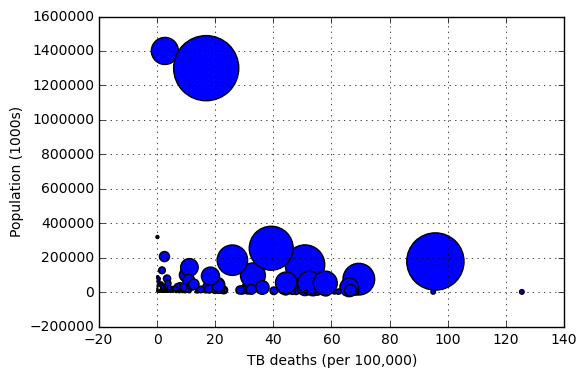

In [33]:
# A picture is worth 1,000 words: Population vs Death rates per 100,000
# To set this up, before any plotting is performed you must execute the %matplotlib 
data.plot(kind='scatter',  x= 'TB deaths (per 100,000)',  y = 'Population (1000s)', s=data['TB deaths']/100 )

###### This graph helps to see the three data elements better & in context: (Population, Rate of deaths/100,000, TB Deaths) 

the following observations can be made:

- The country with the Highest rate of TB deaths is Djibouti [49] with 1,100 deaths from TB and a population 0.876m. This country is a primary target for International health care and the prevention of TB.
- The two countries with the next Highest rate of death are Nigeria [124] and Timor-Leste [172] although actual numbers of TB deaths are quite different. Nigeria 170,000 Timor-Leste 1,100.
- The country next worthy of attention is the large blue circle at the left hand top side this is India [77]. Population: 1.3bn with 220,000 TB deaths giving a rate of 16.9 deaths per 100,000
- The small blue circle next to that represents China [35] with a population of 1.4bn and only 38,000 TB deaths giving a rate of 2.7 deaths per 100,000.

(Note: The five countries that are mentioned are all listed below in index number order)
Just looking at these five countries highlights the difficulty in trying to make sense of just three data elements as the countries are so varied and different.

In [34]:
# How to report different rows of all data together
# countryCodes = [49,124,172,77,35]
data.loc[data.index.isin([49,124,172,77,35])]

Country  Population (1000s)  TB deaths  TB deaths (per 100,000)
35         China           1400000.0      38000                 2.714286
49      Djibouti               876.2       1100               125.542114
77         India           1300000.0     220000                16.923077
124      Nigeria            177476.0     170000                95.787599
172  Timor-Leste              1157.4       1100                95.040608

In [35]:
# Creating a variable called tbColumn enables us to call up all TB death column data & perform calculations  
rateTBColumn = data['TB deaths (per 100,000)'] 
#ratetTBColumn.describe() # Returns Name: Population (1000s), dtype: float64
#rateColumn.sum() Not appropriate or relevant here

What else can we do to analyse the rate of TB deaths per 100,000 data further?
- mean (a number expressing the central or typical value in a set of data, which is calculated by dividing the sum of the values in the set by their number)
- median (a value or quantity lying at the midpoint of a frequency distribution of observed values or quantities)
- mode (the value that occurs most frequently in a given set of data)

In [36]:
rateTBColumn.mean() # Return the mean of the values for the requested axis
# mean : Series or DataFrame (if level specified)
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html

14.10920912596119

In [37]:
rateTBColumn.median()

3.5427927696619586

With **a mean average rate of 14.1 TB deaths per 100,000** how many countries are above this number but below the top 15 list? 

The following report lists the top 56 countries which have more than 14.0 deaths per 100,000 per annum.

56 countries out of 194 represent 28.8% of all countries

In [38]:
data.sort('TB deaths (per 100,000)', ascending = 0)[0:56]# 


Country  Population (1000s)  TB deaths  \
49                                Djibouti               876.2     1100.0   
124                                Nigeria            177476.0   170000.0   
172                            Timor-Leste              1157.4     1100.0   
47        Democratic Republic of the Congo             74877.0    52000.0   
96                                 Liberia              4396.6     3000.0   
158                                Somalia             10517.6     7000.0   
95                                 Lesotho              2109.2     1400.0   
115                             Mozambique             27216.3    18000.0   
117                                Namibia              2402.9     1500.0   
71                           Guinea-Bissau              1800.5     1100.0   
29                                Cambodia             15328.1     8900.0   
184            United Republic of Tanzania             51822.6    30000.0   
62                                   Gabon              1687.7      940.0   
92        Lao People's Democratic Republic              6689.3     3700.0   
4                                   Angola             24227.5    13000.0   
116                                Myanmar             53437.2    28000.0   
165                              Swaziland              1269.1      650.0   
13                              Bangladesh            159078.0    81000.0   
100                             Madagascar             23571.7    12000.0   
89                                Kiribati               110.5       54.0   
32                Central African Republic              4804.3     2300.0   
38                                   Congo              4505.0     2100.0   
159                           South Africa             53969.1    24000.0   
153                           Sierra Leone              6315.6     2800.0   
0                              Afghanistan             31627.5    14000.0   
131                       Papua New Guinea              7463.6     3000.0   
78                               Indonesia            254455.0   100000.0   
106                       Marshall Islands                52.9       20.0   
66                                   Ghana             26786.6     9700.0   
58                                Ethiopia             96958.7    32000.0   
192                                 Zambia             15721.3     5100.0   
30                                Cameroon             22773.0     7100.0   
28                              Cabo Verde               513.9      160.0   
70                                  Guinea             12275.5     3600.0   
160                            South Sudan             11911.2     3400.0   
22                                Botswana              2219.9      620.0   
128                               Pakistan            185044.0    48000.0   
27                                 Burundi             10816.9     2500.0   
33                                    Chad             13587.1     3100.0   
107                             Mauritania              3969.6      890.0   
41                           Cote d'Ivoire             22157.1     4800.0   
150                                Senegal             14672.6     3100.0   
163                                  Sudan             39350.3     8300.0   
88                                   Kenya             44863.6     9400.0   
72                                  Guyana               763.9      160.0   
46   Democratic People's Republic of Korea             25026.8     5000.0   
73                                   Haiti             10572.0     2100.0   
190                               Viet Nam             92423.3    17000.0   
63                                  Gambia              1928.2      350.0   
123                                  Niger             19113.7     3400.0   
119                                  Nepal             28174.7     4900.0   
77                             

The following code was used to gererate totals for the following analysis:
- 56 countries Total Population
- 56 countries TB deaths total

In [39]:
# Special list - Extracting total for selected number of countries sorted in decending order of TB death rate per 100,000 population
temp3 = data.sort('TB deaths (per 100,000)', ascending = 0)[0:56]
spopTB=temp3['Population (1000s)']
stbTB=temp3['TB deaths']
srateTB=temp3['TB deaths (per 100,000)']

In [40]:
spopTB.sum()

3036923.3999999994

In [41]:
stbTB.sum()

982462.40000000002

### Summary of final results:

### ⅓ of the worlds countries account for 88% of worldwide TB deaths
** Ranking the Top 56 counties with rates of TB deaths greater than the mean of 14 deaths per 100,000**
- number of countries 56
- Total sum of combined populations 3,036,923.4k = 3.0bn people  
- Total sum of TB deaths 982,462.4
- Country population as a percentage of the world total 3.0/7.257 = 41%
- Country TB deaths as a percentage of world TB deaths 982,462.4/1,119,116 = 88%

**Unfortunately due to time constrainst we are unable to persue this investigation any further.**

## Conclusions
A conclusion summarising your findings, 
with qualitative analysis of the quantitative results and 
critical reflection on any shortcomings in the data or analysis process.

Despite the United Nations making the eradication of Tuberculosis Millenium Development Goals the results show little sign of improvement.

In [42]:
#Top 5 by Population
#[35,77,185,78,23]
data.loc[data.index.isin([35,77,185,78,23])]

Country  Population (1000s)  TB deaths  \
23                     Brazil              206078       5300   
35                      China             1400000      38000   
77                      India             1300000     220000   
78                  Indonesia              254455     100000   
185  United States of America              319449        460   

     TB deaths (per 100,000)  
23                  2.571842  
35                  2.714286  
77                 16.923077  
78                 39.299680  
185                 0.143998

#### Qualitative analysis of the quantitative results
Top Five Countries by Population: Country Index Codes [23,35,77,78,185]

**Top 5 Countries for population (50%) account for 37% of worldwide deaths from TB**
Because the distribution of populations is not even five countries alone account for almost half the worlds population. They are in descending order of population: China, India, United States of America, Indonesia,Brazil. The combined deaths in 2014 from TB in this group came to a total of 411,760 deaths which when divided by the worldwide figure of 1,119,116 deaths due to TB represents 37%. Whilst it is reasonable to expect that bigger countries will have more TB Deaths this assumtion does not always hold true and there are some notable exceptions which have a TB death rate lower than the worldwide mean of 14 deaths per annum due to TB.

If we sort the TB deaths by country into descending order 3 countries drop out of the list (China, United States of America, Brazil) and three new countries take their place (Nigeria, Bangladesh,Democratic Republic of the Congo). 

In [43]:
#Top 5 by TB deaths
#[35,77,185,78,23]
data.loc[data.index.isin([77,124,78,13,47])]

Country  Population (1000s)  TB deaths  \
13                         Bangladesh              159078      81000   
47   Democratic Republic of the Congo               74877      52000   
77                              India             1300000     220000   
78                          Indonesia              254455     100000   
124                           Nigeria              177476     170000   

     TB deaths (per 100,000)  
13                 50.918417  
47                 69.447227  
77                 16.923077  
78                 39.299680  
124                95.787599

**Top 5 Countries for TB deaths account for 60% of worldwide deaths from TB**
Top 5 Countries by TB deaths: Country Index Codes [13,47,77,78,124] 
India, Nigeria, Indonesia, Bangladesh,Democratic Republic of the Congo,

Whilst the share of worldwide population for this group falls from 50% to 30% the share of deaths caused by TB rises from 37% to 60%. All of these countries have Rates of death caused by TB which are greater than the worldwide mean of 14.0 perople per 100,000. So if you want to tackle Tuberculosis these countries ought to be included in your list.

The country with the largest number of deaths due to TB is India with 220,000 but if you look at their Rate of TB death per 100,000 of their population it is just short of being 3.0 people above the worldwide mean being 16.9. Whereas the Democratic Republic of the Congo has a much higher death rate of 69.5 people per 100,000 but a smaller country population of 52m. So there are wide discrepencies between Countries with large population and TB related deaths. However in order to get a better picture of the problem and investigation was carried out to discover how many countries would have to be included if one wanted to include 80% of all deaths from TB worldwide.
The answer turns out that we would have to extend our original list of countries sorted in descending order of TB deaths from five to fifteen. But this increase the percentage of TB deaths covered from 60% to 80% of worldwide TB related deaths. Whilst the worldwide population covered increases from 30% to 57%.


In [44]:
data.sort('TB deaths', ascending = 0)[:15]

Country  Population (1000s)  TB deaths  \
77                              India           1300000.0     220000   
124                           Nigeria            177476.0     170000   
78                          Indonesia            254455.0     100000   
13                         Bangladesh            159078.0      81000   
47   Democratic Republic of the Congo             74877.0      52000   
128                          Pakistan            185044.0      48000   
35                              China           1400000.0      38000   
58                           Ethiopia             96958.7      32000   
184       United Republic of Tanzania             51822.6      30000   
116                           Myanmar             53437.2      28000   
159                      South Africa             53969.1      24000   
115                        Mozambique             27216.3      18000   
190                          Viet Nam             92423.3      17000   
141                Russian Federation            143429.0      16000   
0                         Afghanistan             31627.5      14000   

     TB deaths (per 100,000)  
77                 16.923077  
124                95.787599  
78                 39.299680  
13                 50.918417  
47                 69.447227  
128                25.939776  
35                  2.714286  
58                 33.003743  
184                57.889801  
116                52.397955  
159                44.469891  
115                66.136837  
190                18.393630  
141                11.155345  
0                  44.265275

**Top 15 Countries for TB deaths account for 80% of worldwide deaths from TB**
Top 15 Countries by TB deaths: Country Index Codes: [77,124,78,13,47,128,35,58,184,116,159,115,190,141,0]

Adding 10 more countries to the previous list creates group with a combined country population of 4.1bn people which represents 30% of worldwide population. Total TB deaths for the group are 888,000 and represents 80% of all worldwide deaths from TB. 

The largest new additions to this group with high rates of TB mortality include the following; Bangladesh (Population 159,078 TB mortality rate 50.9) closely followed by Pakistan (Population 185,044 TB mortality rate 25.9) and then Russia (Population 143,429 TB mortality rate 11.1). But at this point the Country rates appear to increase from around 30.0 to 60.0 whilst their populations fall from 100m to 30m.

** It is hardly surprising that countries with larger populations are likely to have greater numbers of deaths due to TB than smaller populations.**
But if we look at the Rate of deaths per 100,000 within this group they range from 2.7/100,000 in China to 95.8/100,000 in Nigeria.

Trying to classify this group of countries prove problematic as they fall roughly into two group; African or Asian. However it is woth noting that all but one country (i.e. Brazil) is present in the Top 15 Country group and looking at the following data extract one can see why (see BRICs country summary below). Brazil was excluded from inclusion because it was below the threshold of 14,000 TB deaths per annum whereas China was retained. 

## BRICs country analysis:

In [45]:
# BRIC's Countrys [ Brazil China India Russia South Africa]
# countryCodes = [23,35,77,141,159]
data.loc[data.index.isin([23,35,77,141,159])]

Country  Population (1000s)  TB deaths  \
23               Brazil            206078.0       5300   
35                China           1400000.0      38000   
77                India           1300000.0     220000   
141  Russian Federation            143429.0      16000   
159        South Africa             53969.1      24000   

     TB deaths (per 100,000)  
23                  2.571842  
35                  2.714286  
77                 16.923077  
141                11.155345  
159                44.469891

### BRICs country summary:

**The 5 BRIC countries have just short of 30% of all worldwide deaths caused by TB**
BRICs: Country Index Codes: [23,35,77,141,159] Brazil, Russia, India, China
- number of countries 5
- Total sum of combined populations 3,103,476.1k = 3.1bn people 
- Total sum of TB deaths 303,300  
- Country population as a percentage of the world total 3.1/7.257 = 42.7%
- Country TB deaths as a percentage of world TB deaths 982,462.4/1,119,116 = 27%

The 5 BRICS countries had in total 303,300 deaths due to TB in 2014 which is about 30% of worldwide total. But the bulk of the deaths 220,000 come from India which has the second largest population after China. South Africa has the highest death rate of all these countries with 44.5 people per annum. But yhe star performer has to be China which has the worlds largest population 1.4bn peoiple but with 38,000 deaths from TB this equates to a rate per 100,000 of 2.57 deaths from TB which puts it below the mean average and the country is ranked 108th out of 194 countries. Russia also falls below the threshold for TB deaths rates comming in at 11.1 people per 100,000. 

This study fell short of a thorough analysis of TB Rates of death per 100,000 due to time restriction but further investigate of this area is recommended. Also some of the countries already mentioned might warrent further investigation to identify actions that might help other countries in the fight against TB. Two countries spring to mind immediately; China for its barefoot doctor programme and Djibouti for just being top in the world ranking by rates of TB death. 

Also it has to be noted that these statistics are prone to subsequent variation. A prime example is Djibouti which in 2013 was quoted as having 6,000 deaths and then later in the light of further information this figure was 'revised' to 12,000.

# End of Report

Post submission changes:

18/10/16 13:49 Q: How can I display the data so that it really shows the problem?
A: Try plotting Deaths from TB on Y axis and Rate of Deaths from TB on X axis: That should sum the situation that you have been trying to describe
This should be failry easy as we all ready have the code and just need to make a few changes:




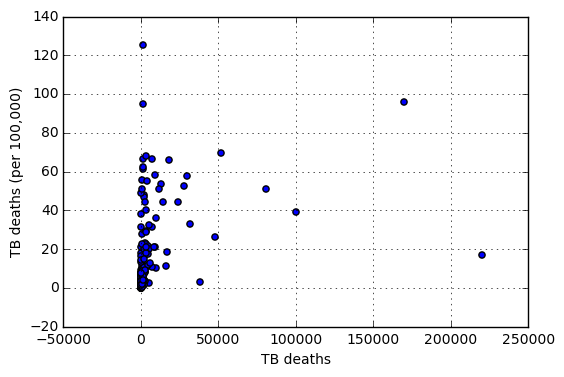

In [46]:
# TB Deaths vs Death rates per 100,000
# To set this up, before any plotting is performed you must execute the %matplotlib 
data.plot(kind='scatter',  x = 'TB deaths', y = 'TB deaths (per 100,000)')

Bingo!Just need to identify each dot on the plot...
Top left - is Djibouti (highest rate of death)
Bottom far right is India (highest TB deaths)
Top right - rate just is Nigeria (under 100 Total TB deaths second highest in TB deaths)

Project Appendix: Coding notes that are useful

In [47]:
# Coding Tips: How to use Markdown
# YouTube guide
# Markdown & LaTeX - Jupyter Tutorial (IPython 3)
# https://www.youtube.com/watch?v=-F4WS8o-G2A

In [48]:
# Coding Tip: display_max_rows
#Hiding most of the data in the middle is the default. 
#It assumes you only need to see a few rows to check that all is working correctly. 
#However you can set a maximum number for rows to display:
#import pandas as pd 
#pd.options.display.max_rows = 999

In [49]:
# Coding Tip: Row selection
# data[a:b] # where a = row index i.e start at 0 and b = a+1
# data.sort('TB deaths', ascending = 0)[:6] # Reports first five rows 
# data.sort('TB deaths', ascending = 0)[-5:] # Reports last five rows

In [50]:
# Coding Tip: Data File indexing: Specifying a range of Rows & Columns to be selected
#data.ix[2:4,['Country','Population (1000s)','TB deaths']] # works for cols & rows 
#data.ix[2:4,['Population (1000s)','TB deaths','Country']] # change the cols around if you want them ordered differently 
#data.sort('TB deaths', ascending = 0).ix[:10,['TB deaths','Country']] #Sorted

In [51]:
# Coding Tips: Data Sorting
# Note: DataFile.sort has been depreciated: ver 0.19.0
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#    #data_sorted = data.sort_values(['Col 1 heading','Col 2 heading'], ascending=False)
#    #data_sorted[['Col 1 heading','Col 2 heading']].head(10)
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

In [52]:
# Coding Tips: Method guide
# The following commands are all equivalent:
# 1. popColumn == data['Population (1000s)'] 
# 2. popColumn.max() == data['Population (1000s)'].max() 
# 3. max(popColumn) == max(data['Population (1000s)']) 
# Peters response:
# 1. popColumn.max()
# 2. max(popColumn)
#Python used to use a mix of both methods, but is now trying to consistently use the first method 
#In the first method .max() is a property of popColumn 

In [53]:
# Graph plotting commands

# 1. To plot histogram of data in cols
#data.hist()

# 2. To plot Population data by country index number (unsorted country list)
#data['Population (1000s)'].plot() # 'Population (1000s)' # Produces a graphical representation of Population data by country index number
#Question: How do you plot a sorted list of Populations in descending order ?

# 3. To plot two columns of data against each other: deaths against Population
#data.plot(kind='scatter', x= 'TB deaths', y = 'Population (1000s)') # This also works by plotting deaths against Population

In [54]:
# Outstanding Task: Trying to control the formatting of results
#popColumn = data['Population (1000s)']
#popColumn.max() 
#max(popColumn)
#print ("%.2f".format(popColumn.sum()) # SyntaxError: unexpected EOF while parsing
#print("Population sum total is: {0} ".format(max(data['Population (1000s)'])))

In [55]:
# to test sort within sort 
# songs.sort_index(by=['Peak', 'Weeks'], ascending=[True, False])
#data.sort_index(by=['TB deaths', 'Country'], ascending=[True, False])
test = data.sort(['TB deaths','Population (1000s)'], ascending = [False, False])
#test = data.sort(['TB deaths'], ascending = 1) # 'Population (1000s)'
#test[23:24]# Produces a list of the top 10 countries by TB deaths but changing population has no effect
#data.irow([23,24,28,32,33])
data.irow([x for x in range(55,71)])

Country  Population (1000s)  TB deaths  TB deaths (per 100,000)
55  Equatorial Guinea               820.9      54.00                 6.578146
56            Eritrea              5110.4     710.00                13.893237
57            Estonia              1316.2      27.00                 2.051360
58           Ethiopia             96958.7   32000.00                33.003743
59               Fiji               886.5      41.00                 4.624929
60            Finland              5479.7      11.00                 0.200741
61             France             64121.2     370.00                 0.577032
62              Gabon              1687.7     940.00                55.697103
63             Gambia              1928.2     350.00                18.151644
64            Georgia              4034.8     270.00                 6.691782
65            Germany             80646.3     330.00                 0.409194
66              Ghana             26786.6    9700.00                36.212136
67             Greece             11000.8     110.00                 0.999927
68            Grenada               106.3       0.47                 0.442145
69          Guatemala             16015.5     260.00                 1.623427
70             Guinea             12275.5    3600.00                29.326708

In [56]:
#data[[3,0]].head()
#data.irow([7,5,2])
#data.columns() # does not work
#data[[3,2,0,1]].head()
#data[3:6] # not working
#data[[3,2,0,1]].irow([4,3,2])
data[[0,1,2,3]].irow([1,2,3]) # this is pretty cool - cols first then rowsf

Country  Population (1000s)  TB deaths  TB deaths (per 100,000)
1  Albania              2889.7      17.00                 0.588296
2  Algeria             38934.3    4400.00                11.301089
3  Andorra                72.8       0.55                 0.755495